<a href="https://colab.research.google.com/github/kiminlim/ds-section1-sprint3/blob/master/n134-clustering/n134a-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

### 데이터 컬럼 설명
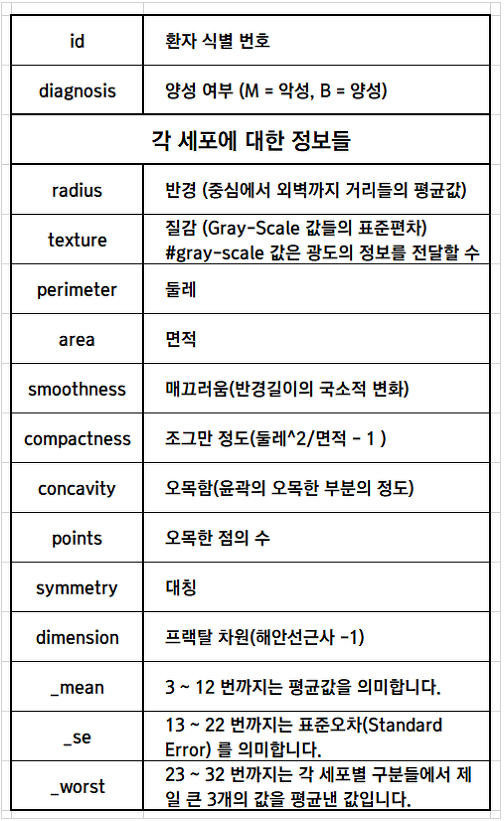

In [405]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [406]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
import matplotlib.pyplot as plt

# df로 불러옵니다

In [407]:
df = pd.read_csv('/content/drive/MyDrive/코드스테이츠(ai 캠프)/data/[n134]breast-cancer-wisconsin-data.csv')
df.head() # 캐글에 유방암 진단 데이터 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [408]:
df.shape # (569, 33)

(569, 33)

In [409]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [410]:
# label = df['diagnosis'] #  "diagnosis"에 있는 label 데이터를 따로 label이라는 변수로 생성
label.unique()

array(['M', 'B'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text

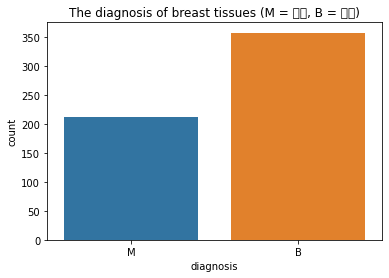

In [411]:
plt.title("The diagnosis of breast tissues (M = 양성, B = 음성)")
sns.countplot(label)

In [412]:
# 불필요한 변수 제거 

# df.describe()
df = df.drop(columns=['diagnosis', 'Unnamed: 32','id'])
df.shape

(569, 30)

In [413]:
# Feature마다 scale이 다르기 때문에 StandardScaler를 적용

scaler = StandardScaler()
Z = scaler.fit_transform(df) 
print(Z.shape,"\n Standardized Data: \n", Z)

(569, 30) 
 Standardized Data: 
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


캐글에서 kmeans 한 사람들은 어제 도전과제처럼 within cluster sum of squares 그래프를 그려보고 변수를 몇개로 해야할지 정해서 군집 분류를 하는 것 같았다. 해당 그래프에서도 2일때 가장 그래프가 꺾여서 2개의 변수로 분류를 하는 것 같다. 근데 어떤 변수로 했을 때 가장 분류를 잘할 지 2개를 어떻게 선택하는 거지? 


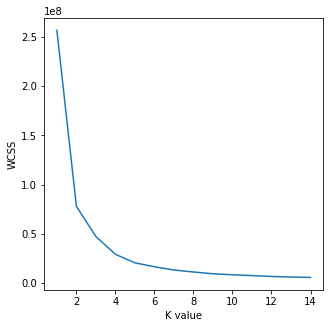

In [414]:
#  K 정하기
# - inertia 가 작아지는 기울기가 완만해지는 k 를 지정 (어느정도 적당한 K 고르기) -> 2
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (5,5))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [415]:
# k-means clustering

from sklearn.cluster import KMeans 
kmeans = KMeans( n_clusters = 2, random_state = 42)
# kmeans = KMeans( n_clusters = 2, random_state = 31)# Form

kmeans.fit(Z) # 입력 데이터에 적합
labels = kmeans.labels_ # 클러스터 할당
print(labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [416]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 시각화

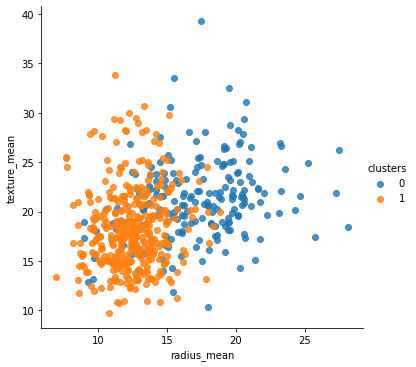

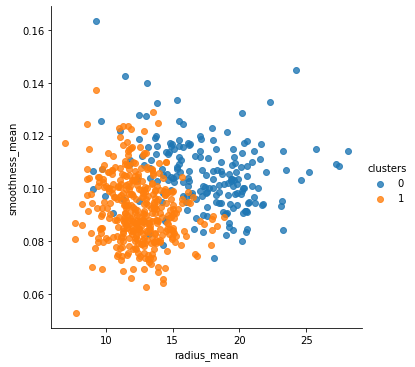

In [417]:
# 시각화 - sns.lmplot
sns.lmplot(x = 'radius_mean', y='texture_mean', hue='clusters', data=df, fit_reg=False)
# sns.lmplot(x = 'radius_mean', y='perimeter_mean', hue='clusters', data=df, fit_reg=False) # 파악 어려움
# sns.lmplot(x = 'radius_mean', y='area_mean', hue='clusters', data=df, fit_reg=False) # 파악 어려움
sns.lmplot(x = 'radius_mean', y='smoothness_mean', hue='clusters', data=df, fit_reg=False)
# sns.lmplot(x = 'radius_mean', y='compactness_mean', hue='clusters', data=df, fit_reg=False)
# -> 그냥 분류가 잘 되었는지 잘 흩뿌려진 두 데이터의 스캐터플롯으로 보여주는 의미인 것 같다.

In [418]:
points = df[[ 'radius_mean','texture_mean']]
points.columns = ['x', 'y']


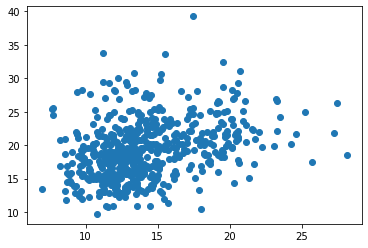

In [419]:
plt.scatter(points.x, points.y)
plt.show()

In [420]:
centroids = points.sample(2) # k-means with 3 cluster
centroids

,x,y
219,19.53,32.47
113,10.51,20.19


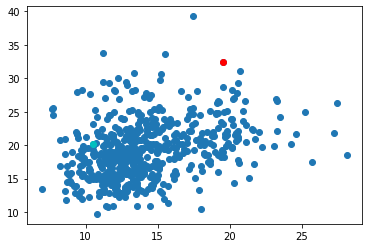

In [421]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "oc")
plt.show()

In [422]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids, iteration):
 
  # 포인트와 centroid 간의 거리 계산
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # 제일 근접한 centroid 선택
  nearest_centroids = np.argmin(distances, axis = 1)
    
  # cluster 할당
  se = pd.Series(nearest_centroids)
  df['cluster_' + iteration] = se.values
  
  return df

In [423]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1


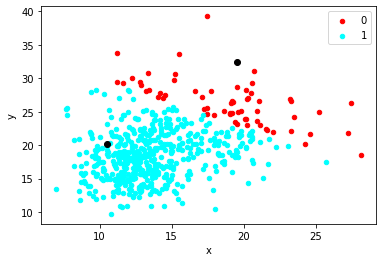

In [424]:
def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [425]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')
centroids

,x,y
cluster_1,,
0,18.846825,26.509206
1,13.539682,18.390771


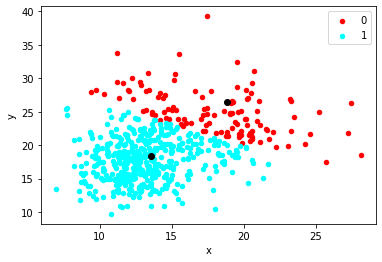

In [426]:
# 변경된 cluster에 대해 centroid 계산
centroids = get_centroids(first_pass, 'cluster_1')

second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

plot_clusters(second_pass, 'cluster_2', centroids)

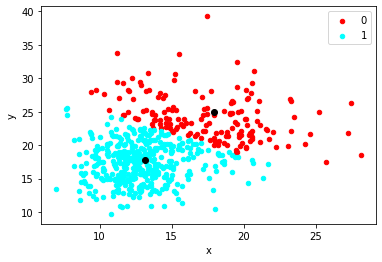

In [427]:
centroids = get_centroids(second_pass, 'cluster_2')

third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

plot_clusters(third_pass, 'cluster_3', centroids)

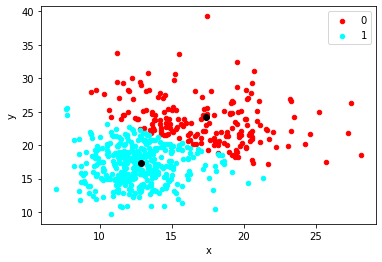

In [428]:
centroids = get_centroids(third_pass, 'cluster_3')

fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

plot_clusters(fourth_pass, 'cluster_4', centroids)

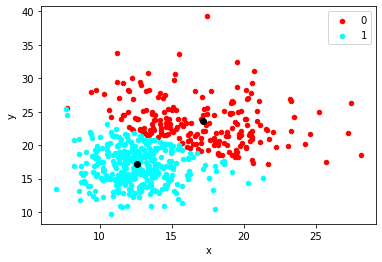

In [429]:
centroids = get_centroids(fourth_pass, 'cluster_4')

fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

plot_clusters(fifth_pass, 'cluster_5', centroids)

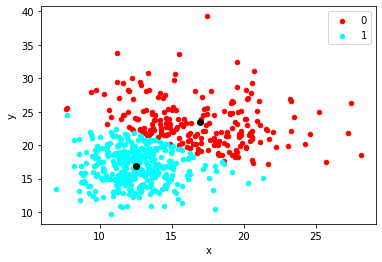

In [430]:
centroids = get_centroids(fifth_pass, 'cluster_5')

sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

plot_clusters(sixth_pass, 'cluster_6', centroids)

In [431]:
# 유의미한 차이가 없을 때 까지 반복, 이번 경우에는 전체 cluster에 변화가 없는 것을 기준으로 하겠습니다.
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])
convergence

False

In [432]:
dataWithoutLabels = df
dataWithoutLabels["type"] = clusters

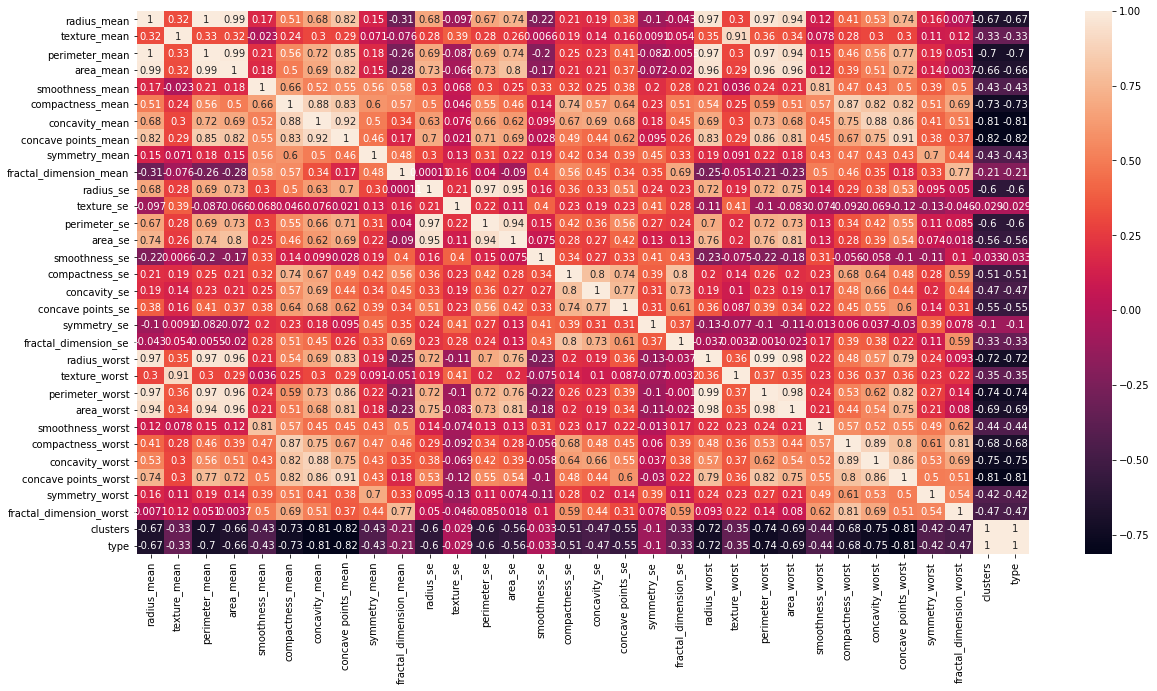

In [433]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [434]:
# plt.figure(figsize = (10, 5))
# plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 0], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 0], color = "red")
# plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 1], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 1], color = "green")
# plt.xlabel('radius_mean')
# plt.ylabel('texture_mean')
# plt.show()

In [435]:
# Data centroids middle of clustered scatters

# plt.figure(figsize = (10,5))
# plt.scatter(dataWithoutLabels["radius_mean"], dataWithoutLabels["texture_mean"], c = clusters, alpha = 0.5)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
# plt.xlabel('radius_mean')
# plt.ylabel('texture_mean')
# plt.show() # **

## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [436]:
df['clusters'].value_counts()

1    375
0    194
Name: clusters, dtype: int64

In [437]:
label.value_counts() # 0->B로, 1->M으로 맵핑

B    357
M    212
Name: diagnosis, dtype: int64

In [438]:
# 이곳에 답안을 작성하시기 바랍니다
df['clusters'] = df['clusters'].replace(0,'M')
df['clusters'] = df['clusters'].replace(1,'B')

In [439]:
pd.DataFrame([label, df['clusters']]).T

,diagnosis,clusters
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
...,...,...
564,M,M
565,M,M
566,M,M
567,M,M


In [440]:
pd.crosstab(label, df['clusters'])

clusters,B,M
diagnosis,,
B,339,18
M,36,176


In [441]:
(339 + 176) / (339+176+36+18) # randomseed 42

0.9050966608084359

In [442]:
(label == df['clusters']).sum() / len(label)

0.9050966608084359

In [443]:
(343+175)/(343+175+37+14) # randomseed 31

0.9103690685413005

In [444]:
Acc = (label == df['clusters']).sum() / len(label)
print('K-means 모델의 암 진단 정확도는 %.2f 입니다.'%Acc)

K-means 모델의 암 진단 정확도는 0.91 입니다.


# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


In [445]:
dataWithoutLabels 
dataWithoutLabels.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,0


In [446]:
dataWithoutLabels = df.loc[:,['radius_mean','texture_mean']]
# dataWithoutLabels["type"] = clusters
# dataWithoutTypes = dataWithoutLabels.drop(["type"], axis = 1)
dataWithoutTypes.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


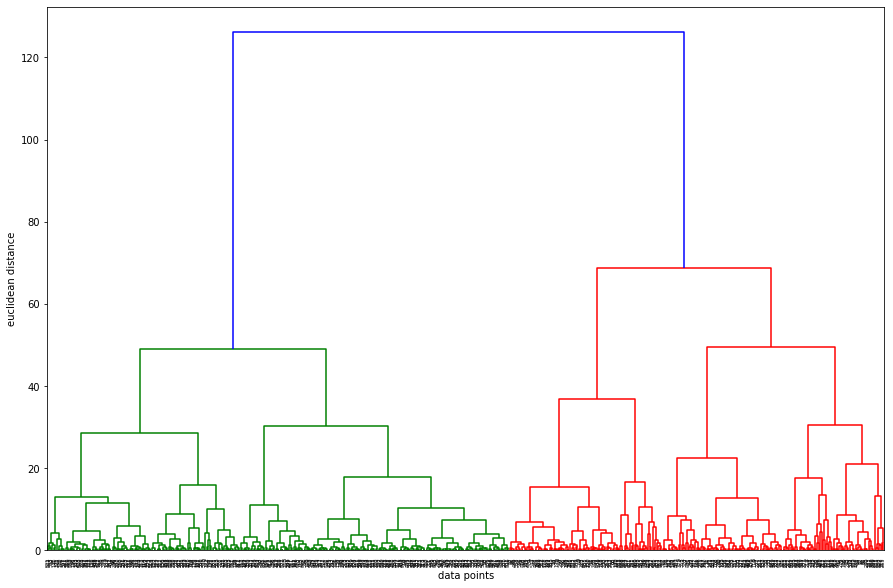

In [447]:
from scipy.cluster.hierarchy import linkage,dendrogram

plt.figure(figsize = (15,10))
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show() # ---- 계층적 군집 분류로도 크게 2가지로 분류되는 것을 확인 할 수 있다?.
#  (주어진 데이터는 이미 라벨이 양성, 음성 2개로 이미 나와있지만 오늘은 그냥 비지도학습 모델을 써보는 것이므로. 2개로 맞게 예측한 것의 의의 ) # 

## 군집화 비교

In [448]:
# df1 = df.drop(columns=['clusters','type'])
# df1

In [449]:
# from sklearn.cluster import DBSCAN
# clus = DBSCAN(eps = 0.9, min_samples=2, metric='euclidean')
# clus.fit(points) # 입력 데이터에 적합
# df1['labels'] = clus.labels_ # 클러스터 할당
# print(df1['labels'])

In [450]:
# pd.crosstab(label, df1['labels'])
# df1['labels'].unique() 

In [451]:

# df['clusters'] = df['clusters'].replace(0,'M')
# df['clusters'] = df['clusters'].replace(1,'B')

In [452]:
# Acc = (label == df['clusters']).sum() / len(label)
# print('K-means 모델의 암 진단 정확도는 %.2f 입니다.'%Acc)